In [21]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        for _ in range(self.epochs):
            y_pred = self.predict(X)
            
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)
            
            if self.penalty == 'L1': 
                dw += (self.alpha / num_samples) * np.sign(self.weights)
            elif self.penalty == 'L2': 
                dw += (2 * self.alpha / num_samples) * self.weights
            
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
drive.mount('/content/drive')
path = ('/content/Real estate.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


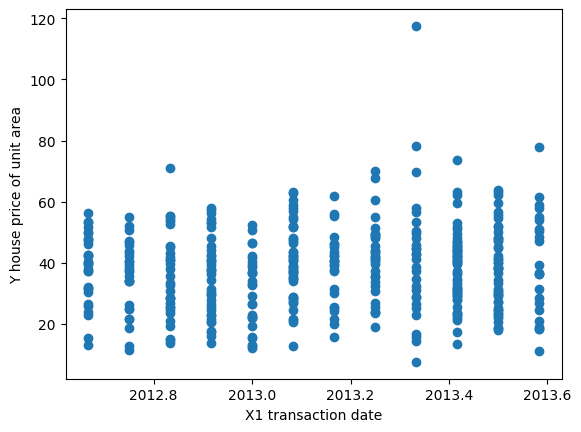

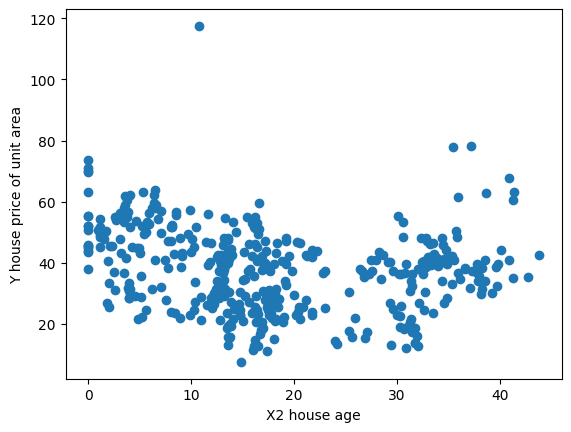

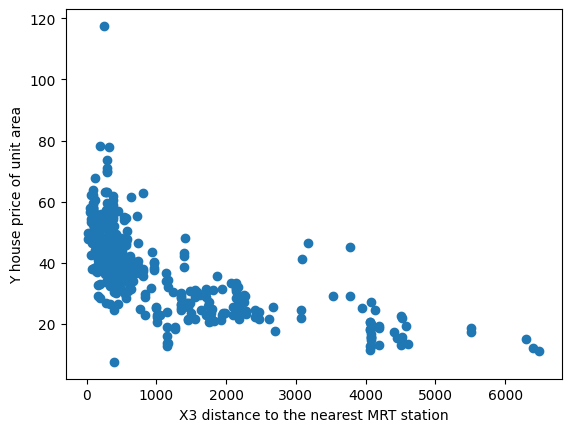

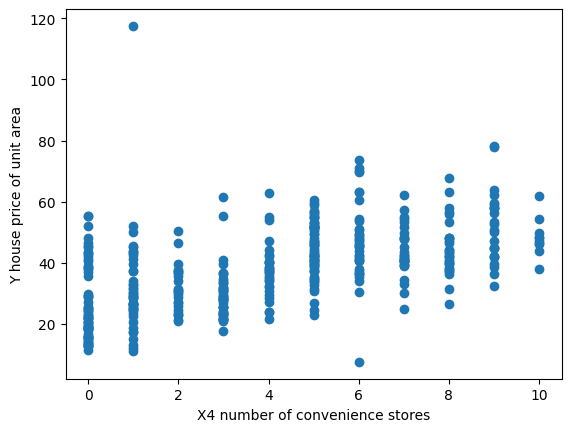

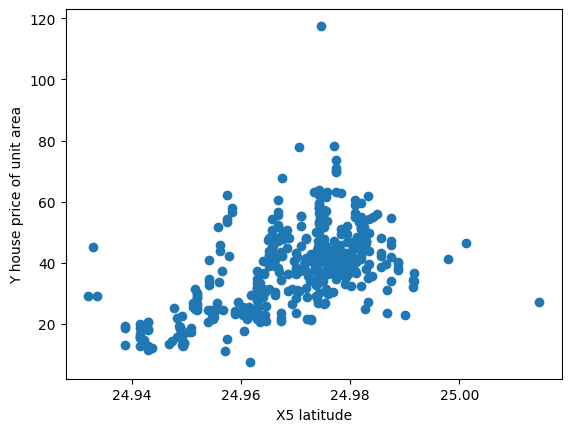

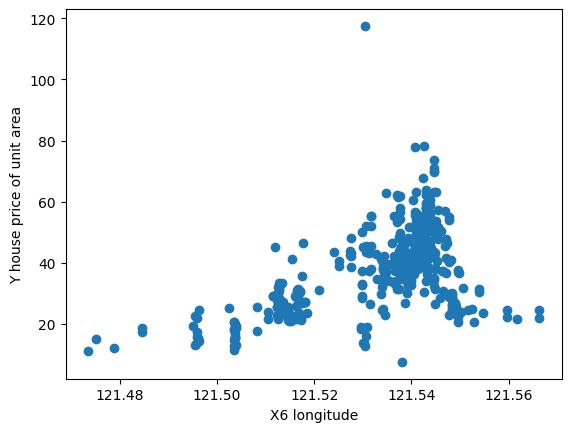

Custom Models:
Linear Regression - MSE: 66.67336271835958 R2: 0.5796624182861772
Lasso Regression - MSE: 65.71283342483493 R2: 0.5857180084640858
Ridge Regression - MSE: 66.43744797904603 R2: 0.5811497263650061
Sklearn Models:
Linear Regression - MSE: 66.67336271835958 R2: 0.5796624182861772
Lasso Regression - MSE: 65.71283342483493 R2: 0.5857180084640858
Ridge Regression - MSE: 66.43744797904603 R2: 0.5811497263650061


In [23]:
df = pd.read_csv(path)

print(df.isnull().sum())
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.25, random_state=42)
X_cols = df.columns[1:-1]
y_col = df.columns[-1]
for col in X_cols:
    plt.scatter(df[col], df[y_col])
    plt.xlabel(col)
    plt.ylabel(y_col)
    plt.show()
df = df.drop(columns=['No'])
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


ridge = Ridge(alpha=0.1)  
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Custom Models:")
print("Linear Regression - MSE:", mse_lr, "R2:", r2_lr)
print("Lasso Regression - MSE:", mse_lasso, "R2:", r2_lasso)
print("Ridge Regression - MSE:", mse_ridge, "R2:", r2_ridge)

sk_lr = LinearRegression()
sk_lr.fit(X_train, y_train)
y_pred_sk_lr = sk_lr.predict(X_test)

sk_lasso = Lasso(alpha=0.1)  
sk_lasso.fit(X_train, y_train)
y_pred_sk_lasso = sk_lasso.predict(X_test)

sk_ridge = Ridge(alpha=0.1)  
sk_ridge.fit(X_train, y_train)
y_pred_sk_ridge = sk_ridge.predict(X_test)

mse_sk_lr = mean_squared_error(y_test, y_pred_sk_lr)
r2_sk_lr = r2_score(y_test, y_pred_sk_lr)

mse_sk_lasso = mean_squared_error(y_test, y_pred_sk_lasso)
r2_sk_lasso = r2_score(y_test, y_pred_sk_lasso)

mse_sk_ridge = mean_squared_error(y_test, y_pred_sk_ridge)
r2_sk_ridge = r2_score(y_test, y_pred_sk_ridge)

print("Sklearn Models:")
print("Linear Regression - MSE:", mse_sk_lr, "R2:", r2_sk_lr)
print("Lasso Regression - MSE:", mse_sk_lasso, "R2:", r2_sk_lasso)
print("Ridge Regression - MSE:", mse_sk_ridge, "R2:", r2_sk_ridge)

Accuracy (Custom Logistic Regression): 0.9122807017543859
Accuracy (Sklearn Logistic Regression): 0.9824561403508771
Classification Report (Custom Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        43
           1       0.88      1.00      0.93        71

    accuracy                           0.91       114
   macro avg       0.94      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114

Classification Report (Sklearn Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix (Custom Logistic Regression):
[[33 10]
 [ 0 71]]
Confusion Matrix (Sklearn Logistic Regression):
[[41  2]
 

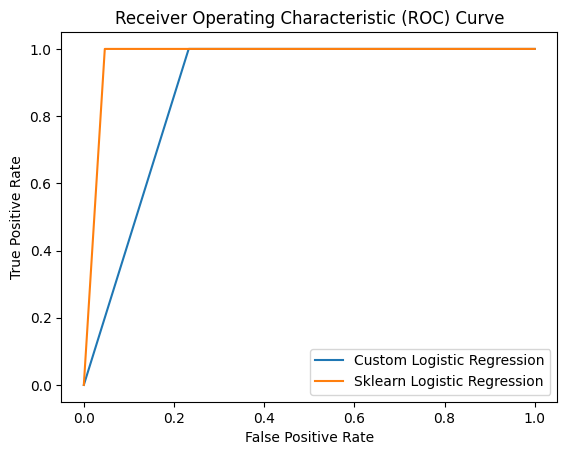

In [24]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


data = load_breast_cancer()
X = data.data
y = data.target


scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))


class LogisticRegression:
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)
        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw.reshape(-1, 1)
            self.bias -= self.lr * db


    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        y_pred_class = np.where(y_pred >= 0.5, 1, 0)
        return y_pred_class


lr = LogisticRegression(learning_rate=0.01, epochs=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


sklearn_lr = SklearnLogisticRegression()
sklearn_lr.fit(X_train, y_train)
y_pred_sklearn_lr = sklearn_lr.predict(X_test)


accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_sklearn_lr = accuracy_score(y_test, y_pred_sklearn_lr)
print("Accuracy (Custom Logistic Regression):", accuracy_lr)
print("Accuracy (Sklearn Logistic Regression):", accuracy_sklearn_lr)


print("Classification Report (Custom Logistic Regression):")
print(classification_report(y_test, y_pred_lr))
print("Classification Report (Sklearn Logistic Regression):")
print(classification_report(y_test, y_pred_sklearn_lr))


print("Confusion Matrix (Custom Logistic Regression):")
print(confusion_matrix(y_test, y_pred_lr))
print("Confusion Matrix (Sklearn Logistic Regression):")
print(confusion_matrix(y_test, y_pred_sklearn_lr))


roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
roc_auc_sklearn_lr = roc_auc_score(y_test, y_pred_sklearn_lr)
print("ROC AUC Score (Custom Logistic Regression):", roc_auc_lr)
print("ROC AUC Score (Sklearn Logistic Regression):", roc_auc_sklearn_lr)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
fpr_sklearn_lr, tpr_sklearn_lr, _ = roc_curve(y_test, y_pred_sklearn_lr)

plt.plot(fpr_lr, tpr_lr, label="Custom Logistic Regression")
plt.plot(fpr_sklearn_lr, tpr_sklearn_lr, label="Sklearn Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()

In [40]:
import pandas as pd
path2 = ('/content/Real estate.csv')
df = pd.read_csv(path2)


import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



X = df.drop("Type", axis=1)
y = df["Type"]


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


y_pred_knn = knn.predict(X_test)


accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Accuracy (Sklearn KNN):", accuracy_knn)


dt_classifier = DecisionTreeClassifier(max_depth=5)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)


accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Accuracy (Decision Tree):", accuracy_dt)


tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=label_encoder.classes_.astype(str))